In [1]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
num_rows, num_cols = gdp_df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 7176
Number of columns: 4


In [4]:
print(gdp_df.info(["data types"]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp_df = gdp_df.drop('Value Footnotes', axis=1)
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

In [15]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2020     1970.560169
1     Afghanistan  2019     2065.036235
2     Afghanistan  2018     2033.804389
3     Afghanistan  2017     2058.400221
4     Afghanistan  2016     2057.067978
...           ...   ...             ...
7171     Zimbabwe  1994     2603.927369
7172     Zimbabwe  1993     2420.092791
7173     Zimbabwe  1992     2437.152908
7174     Zimbabwe  1991     2733.696626
7175     Zimbabwe  1990     2652.129209

[7176 rows x 3 columns]


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [31]:
num_years = gdp_df['Year'].nunique()
print(num_years)

31


In [30]:
missing_year = gdp_df.groupby('Country')['Year'].count()
print(missing_year)


Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64


In [29]:
missing_data = missing_year[missing_year < num_years].index.tolist()
print(missing_data)

['Afghanistan', 'Bosnia and Herzegovina', 'Cambodia', 'Canada', 'Cayman Islands', 'Croatia', 'CuraÃ§ao', 'Djibouti', 'Estonia', 'Hungary', 'Iceland', 'Israel', 'Kosovo', 'Kuwait', 'Latvia', 'Liberia', 'Libya', 'Lithuania', 'Maldives', 'Moldova', 'Montenegro', 'Nauru', 'Other small states', 'Palau', 'Qatar', 'San Marino', 'Serbia', 'Sint Maarten (Dutch part)', 'Slovak Republic', 'Slovenia', 'Small states', 'Somalia', 'SÃ£o TomÃ© and Principe', 'Timor-Leste', 'Turkmenistan', 'Turks and Caicos Islands', 'West Bank and Gaza']


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [43]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
print(gdp_2020)


                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]


(array([110.,  60.,  23.,  20.,  14.,   6.,   3.,   1.,   2.,   1.]),
 array([   731.06407364,  11913.68861346,  23096.31315328,  34278.9376931 ,
         45461.56223291,  56644.18677273,  67826.81131255,  79009.43585237,
         90192.06039218, 101374.684932  , 112557.30947182]),
 <BarContainer object of 10 artists>)

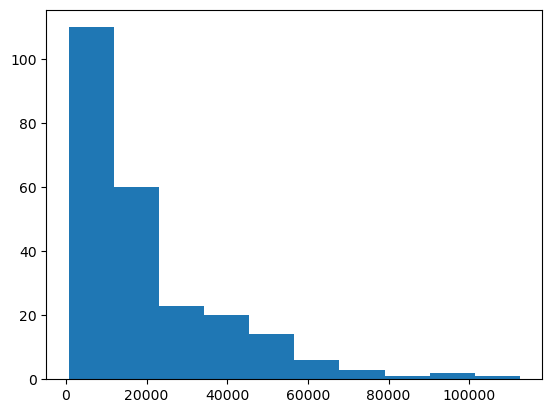

In [42]:
plt.hist(gdp_2020['GDP_Per_Capita'], bins=10)

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

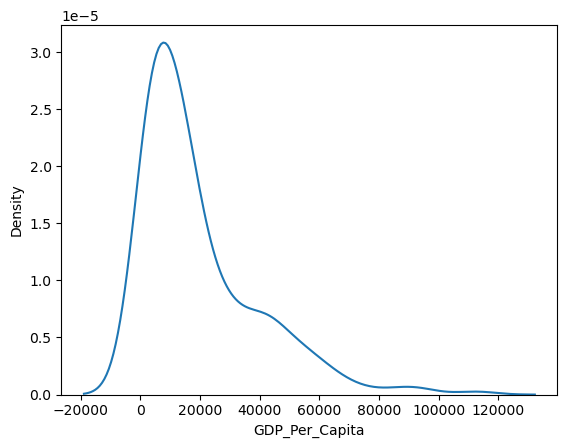

In [57]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])


<Axes: >

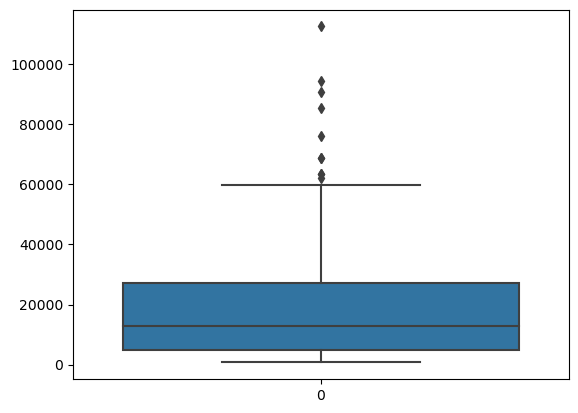

In [62]:
sns.boxplot(gdp_2020['GDP_Per_Capita'])

<Axes: >

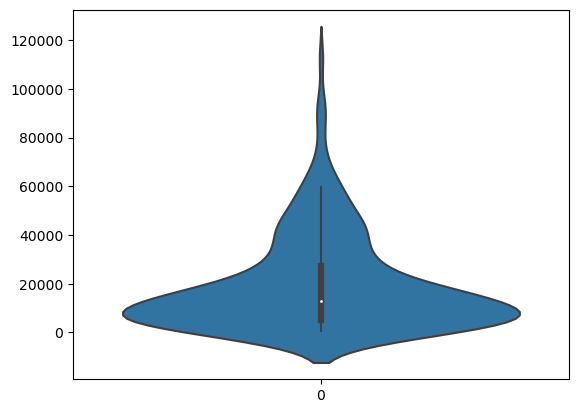

In [67]:
sns.violinplot(gdp_2020['GDP_Per_Capita'])

9. What was the median GDP per capita value in 2020?

In [70]:
round(gdp_2020['GDP_Per_Capita'].median(),2)

12908.94

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [73]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

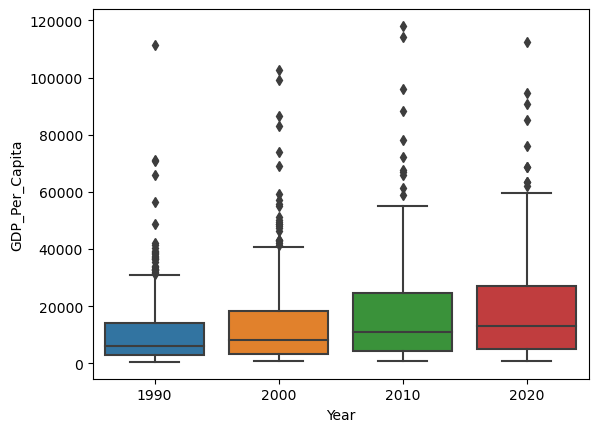

In [76]:
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

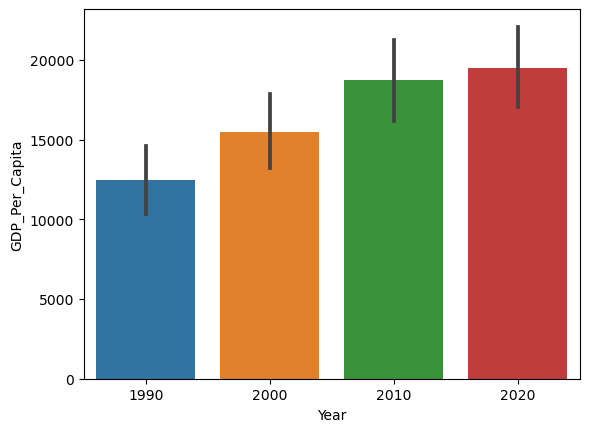

In [78]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

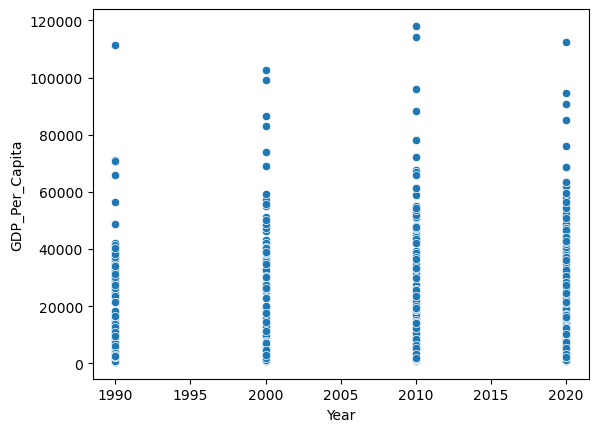

In [80]:
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

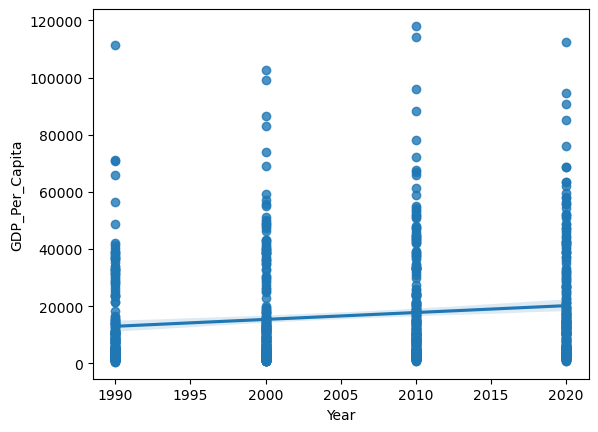

In [81]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

11. Which country was the first to have a GDP per capita greater than $100,000?

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

18. How does the distribution of internet users percent differ for 2000 and 2014?

19. For how many countries was the percentage of internet users below 5% in 2014?

20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

### Bonus exercise:
1.    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.